In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

print("pandas version:", pd.__version__)
print('numpy version:',  np.__version__)
print('matplotlib version:',  matplotlib.__version__)

pandas version: 0.25.3
numpy version: 1.17.4
matplotlib version: 3.1.3


## traits

In [2]:
mic_traits = pd.read_csv('Mic_traitsbase_20201.csv',index_col=0)
mic_traits.head()

,F/B,C,N,P,Uptake_Gene,Enz_Gene,Osmo_Gene,Uptake_Cost,Enz_Consti_Cost,Enz_Induci_Cost,Osmo_Consti_Cost,Osmo_Induci_Cost,Drought_tolerance
Tax1,0.0,1.0,0.193939,0.018182,14.0,26.0,1.0,0.095387,0.000091,0.000060,3.784309e-07,0.000043,0.371122
Tax2,0.0,1.0,0.193939,0.018182,6.0,4.0,1.0,0.030886,0.000095,0.000098,2.410257e-07,0.000052,0.465477
Tax3,0.0,1.0,0.193939,0.018182,14.0,37.0,1.0,0.067129,0.000092,0.000070,3.588293e-07,0.000080,0.776083
Tax4,0.0,1.0,0.193939,0.018182,12.0,25.0,1.0,0.058408,0.000013,0.000052,3.362023e-07,0.000089,0.879527
Tax5,0.0,1.0,0.193939,0.018182,13.0,26.0,1.0,0.030056,0.000027,0.000040,5.274856e-07,0.000095,0.954190


In [3]:
mic_base = pd.read_csv('Mic_base_20201.csv',index_col=0)
mic_base = mic_base/10000
mic_base.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0109,0.010503,0.010269,0.010001,0.009817,0.009703,0.009655,0.009746,0.009917,0.010127,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax2,0.0102,0.010058,0.010019,0.009984,0.009954,0.009831,0.009811,0.009795,0.009785,0.009778,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Tax3,0.0114,0.011061,0.010799,0.010512,0.010321,0.010291,0.010325,0.010303,0.010457,0.010638,...,0.011113,0.010938,0.010719,0.010495,0.010330,0.010103,0.009834,0.009635,0.009433,0.009276
Tax4,0.0095,0.009415,0.009349,0.009302,0.009093,0.009107,0.009148,0.009212,0.009310,0.009426,...,1.277067,1.274632,1.273019,1.270150,1.266344,1.262841,1.257662,1.254030,1.249659,1.247409
Tax5,0.0117,0.011605,0.011521,0.011449,0.011397,0.011362,0.011345,0.011342,0.011360,0.011390,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
mic_basex10 = pd.read_csv('Mic_basex10_20201.csv',index_col=0)
mic_basex10 = mic_basex10/10000
mic_basex10.head()

,0,1,2,3,4,5,6,7,8,9,...,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650
Tax1,0.0109,0.010503,0.010269,0.010001,0.009817,0.009703,0.009655,0.009746,0.009917,0.010127,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax2,0.0102,0.010058,0.010019,0.009984,0.009954,0.009831,0.009811,0.009795,0.009785,0.009778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax3,0.0114,0.011061,0.010799,0.010512,0.010321,0.010291,0.010325,0.010303,0.010457,0.010638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax4,0.0095,0.009415,0.009349,0.009302,0.009093,0.009107,0.009148,0.009212,0.009310,0.009426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tax5,0.0117,0.011605,0.011521,0.011449,0.011397,0.011362,0.011345,0.011342,0.011360,0.011390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## taxon level tradeoff

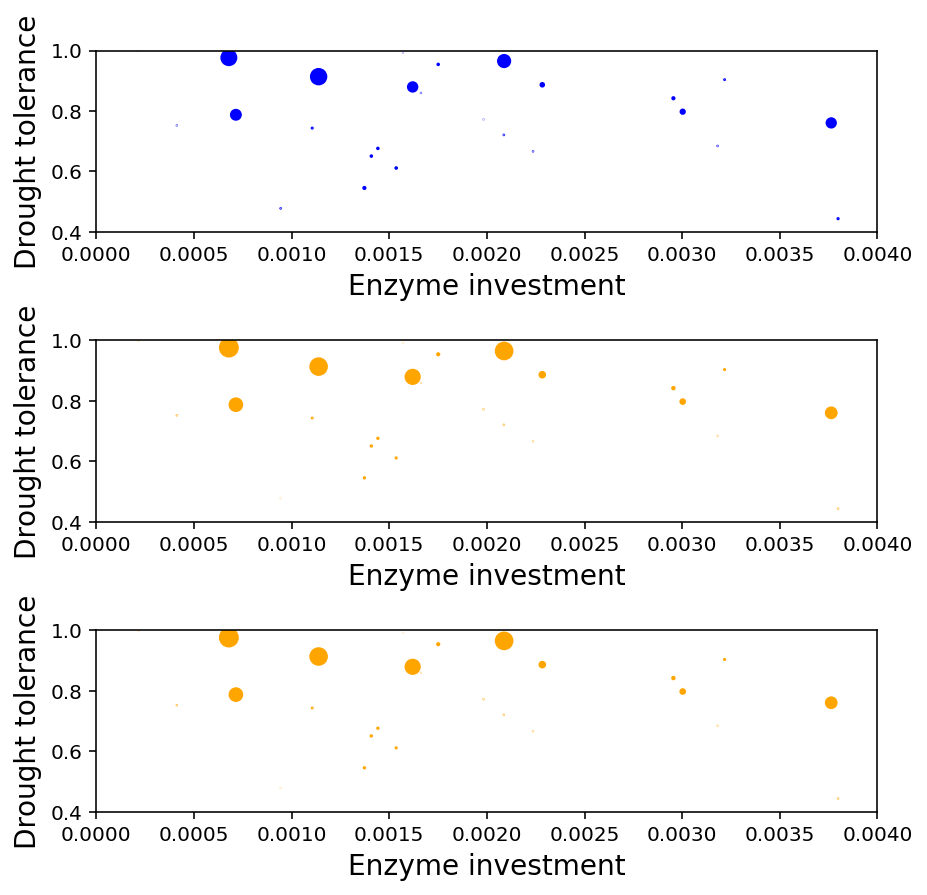

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(7,7))

s1 = 20*4*mic_base.iloc[:,365*3-257]/mic_base.iloc[:,365*3-257].max()
ax1.scatter((mic_traits['Enz_Consti_Cost']+mic_traits['Enz_Induci_Cost'])*mic_traits['Enz_Gene'],mic_traits['Drought_tolerance'],s=s1,c='blue')
ax1.set_xlabel('Enzyme investment',size=14)
ax1.set_ylabel('Drought tolerance',size=14)
ax1.set_xlim(0,0.004)
ax1.set_ylim(0.4,1.0)

s2 = 20*4*mic_base.iloc[:,365*3-75]/mic_base.iloc[:,365*3-75].max()
ax2.scatter((mic_traits['Enz_Consti_Cost']+mic_traits['Enz_Induci_Cost'])*mic_traits['Enz_Gene'],mic_traits['Drought_tolerance'],s=s2,c='orange')
ax2.set_xlabel('Enzyme investment',size=14)
ax2.set_ylabel('Drought tolerance',size=14)
ax2.set_xlim(0,0.004)
ax2.set_ylim(0.4,1.0)


s3 = 20*4*mic_basex10.iloc[:,365*3-75]/mic_basex10.iloc[:,365*3-75].max()
ax3.scatter((mic_traits['Enz_Consti_Cost']+mic_traits['Enz_Induci_Cost'])*mic_traits['Enz_Gene'],mic_traits['Drought_tolerance'],s=s3,c='orange')
ax3.set_xlabel('Enzyme investment',size=14)
ax3.set_ylabel('Drought tolerance',size=14)
ax3.set_xlim(0,0.004)
ax3.set_ylim(0.4,1.0)


plt.subplots_adjust(hspace=0.6)


plt.show()

In [5]:
relative_mass = mic_base.div(mic_base.sum(axis=0),axis=1)
drought_tol   = mic_traits['Drought_tolerance']
community_drought = relative_mass.mul(drought_tol,axis=0).sum(axis=0)

enzyme_trait  = (mic_traits['Enz_Induci_Cost'] + mic_traits['Enz_Consti_Cost']) * mic_traits['Enz_Gene']
community_enzyme = relative_mass.mul(enzyme_trait,axis=0).sum(axis=0)

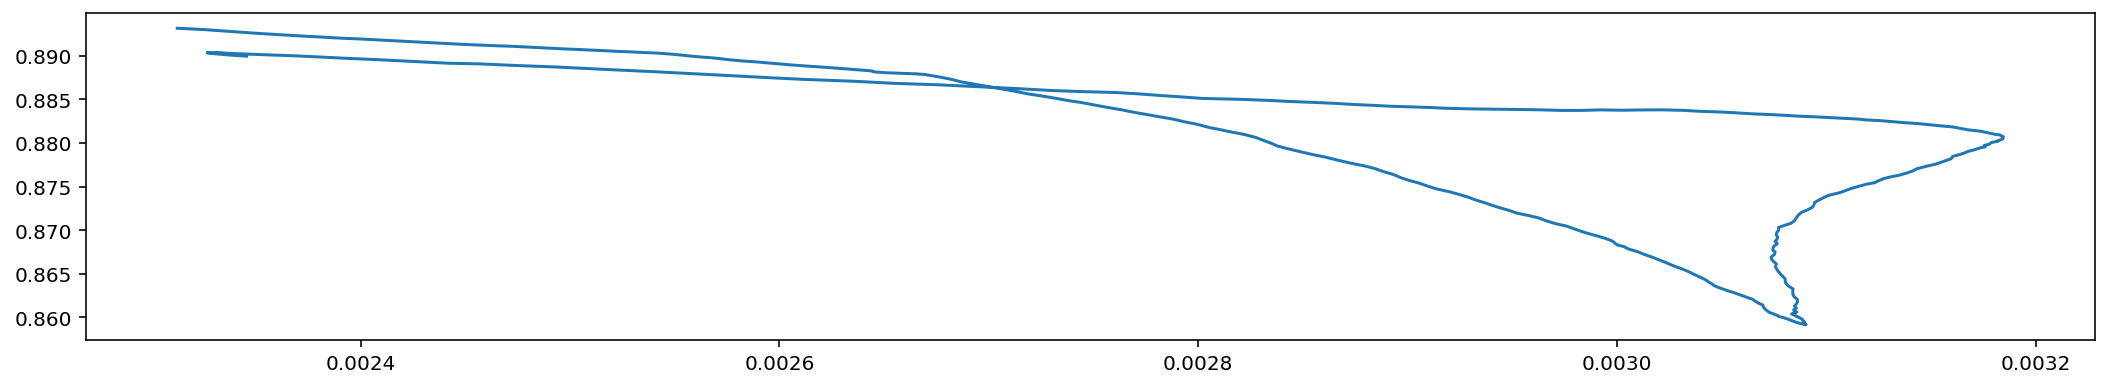

In [6]:
fig,ax = plt.subplots(1,1,figsize=(18,3))

ax.plot(community_enzyme[365*2+1:365*3+1],community_drought[365*2+1:365*3+1])